In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_events = pd.read_csv('./Data/Natural-Disasters.csv',delimiter=';')

C:\Users\jonas\AppData\Local\Temp\ipykernel_20408\4279976546.py:1: DtypeWarning: Columns (18,19,24,25,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df_events = pd.read_csv('./Data/Natural-Disasters.csv',delimiter=';')


In [3]:
df_events.describe()

,Year,Seq,AID Contribution ('000 US$),Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,...,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)"
count,16545.000000,16545.000000,7.760000e+02,5.046000e+03,16545.000000,16150.000000,12936.000000,16545.000000,15845.000000,13016.000000,...,4.107000e+03,9.604000e+03,2.463000e+03,1.206000e+04,3.400000e+01,3.400000e+01,1.109000e+03,1.109000e+03,5.367000e+03,5.365000e+03
mean,1997.700030,726.939015,2.003959e+04,4.684230e+04,1997.708976,6.459071,15.227118,1997.763554,6.598233,15.804471,...,2.535969e+03,8.730170e+05,7.239043e+04,7.108763e+05,2.543790e+06,3.700856e+06,9.096904e+05,1.248945e+06,7.806739e+05,1.248384e+06
std,20.323467,1943.470284,1.690305e+05,3.076485e+05,20.322089,3.398579,8.941742,20.310223,3.365517,8.873228,...,3.353757e+04,8.422488e+06,5.195502e+05,7.594767e+06,5.169353e+06,8.415120e+06,3.711396e+06,4.750374e+06,4.988408e+06,6.982026e+06
min,1900.000000,1.000000,1.000000e+00,-5.700000e+01,1900.000000,1.000000,1.000000,1900.000000,1.000000,1.000000,...,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,8.400000e+01,1.260000e+02,3.400000e+01,4.600000e+01,2.000000e+00,2.000000e+00
25%,1990.000000,95.000000,1.747500e+02,7.000000e+00,1990.000000,4.000000,7.000000,1990.000000,4.000000,8.000000,...,1.300000e+01,1.249250e+03,5.555000e+02,6.595000e+02,2.612500e+04,4.287300e+04,5.000000e+04,9.145200e+04,9.970000e+03,1.813900e+04
50%,2002.000000,276.000000,7.245000e+02,1.500000e+02,2002.000000,7.000000,15.000000,2002.000000,7.000000,16.000000,...,5.000000e+01,1.000000e+04,3.000000e+03,6.000000e+03,1.970000e+05,2.658890e+05,1.650000e+05,2.549260e+05,6.250000e+04,1.270310e+05
75%,2012.000000,496.000000,3.669750e+03,1.047575e+04,2012.000000,9.000000,23.000000,2012.000000,9.000000,24.000000,...,2.000000e+02,9.171000e+04,1.727050e+04,5.892200e+04,1.883547e+06,2.085684e+06,5.000000e+05,8.050520e+05,3.487500e+05,6.257570e+05
max,2023.000000,9881.000000,3.518530e+06,1.302587e+07,2023.000000,12.000000,31.000000,2023.000000,12.000000,31.000000,...,1.800000e+06,3.300000e+08,1.585000e+07,3.300000e+08,2.500000e+07,4.392238e+07,6.000000e+07,8.991316e+07,2.100000e+08,2.732184e+08


# Notes on the data

Some things to take away from this dataset, first of all we have some missing start day and start month (the start years seem to be all there)
sticking to the dates, most of the events seem to have occured in the late 90's and the 2000's 

C:\Users\jonas\AppData\Local\Temp\ipykernel_20408\4044557679.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_by_year = df_events.groupby('Start Year', as_index=False).sum()


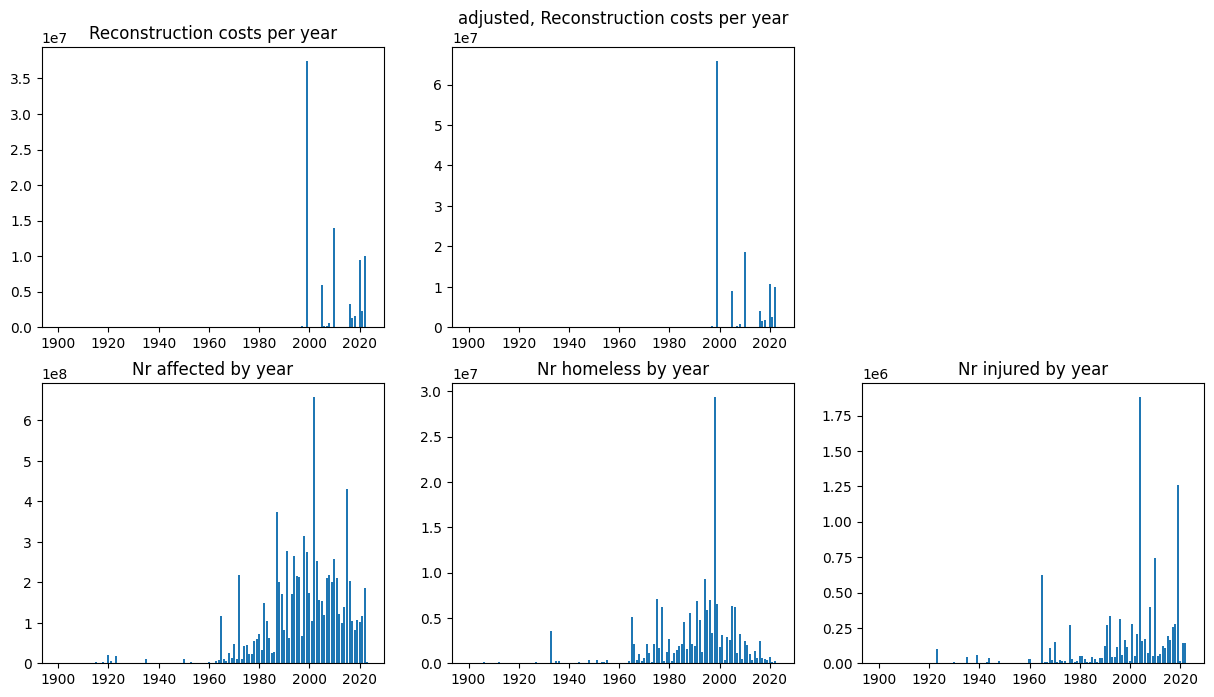

In [4]:
grouped_by_year = df_events.groupby('Start Year', as_index=False).sum()
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(2,3,1)
ax1.set_title("Reconstruction costs per year")
ax1.bar(grouped_by_year['Start Year'], grouped_by_year['Reconstruction Costs (\'000 US$)'])
ax2 = fig.add_subplot(2,3,2)
ax2.set_title("adjusted, Reconstruction costs per year")
ax2.bar(grouped_by_year['Start Year'], grouped_by_year['Reconstruction Costs, Adjusted (\'000 US$)'])
ax3 = fig.add_subplot(2,3,4)
ax3.set_title('Nr affected by year')
ax3.bar(grouped_by_year['Start Year'], grouped_by_year['No Affected'])
ax4 = fig.add_subplot(2,3,5)
ax4.set_title('Nr homeless by year')
ax4.bar(grouped_by_year['Start Year'], grouped_by_year['No Homeless'])
ax5 = fig.add_subplot(2,3,6)
ax5.set_title("Nr injured by year")
ax5.bar(grouped_by_year['Start Year'], grouped_by_year['No Injured'])
plt.show()

There also seems to be no data for the reconstruction costs between the 1900 - (late) 1990,
Number of affected, homeless and injured is also mostly from 1960-2023

We may need to look to augment these columns with extra data found, there is a uuid field (glide) which should be able to specificaly identify each natural disaster so maybe we can use this to augment these columns ?

<BarContainer object of 124 artists>

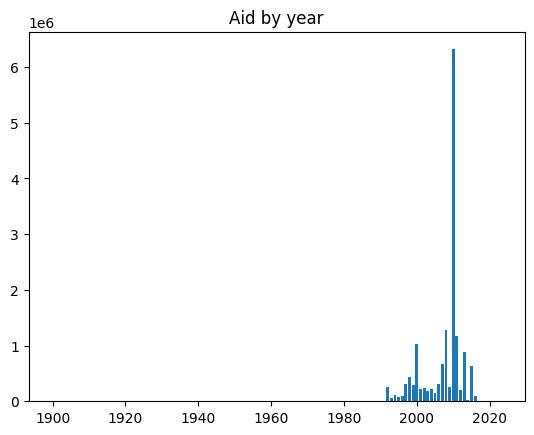

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Aid by year")
ax.bar(grouped_by_year['Start Year'], grouped_by_year['AID Contribution (\'000 US$)'])

The aid field (which might not be all that interesting for our visualisations anyway) is also really underpopulated

In [6]:
df_events[~df_events['Admin1 Code'].isna()]['Admin1 Code'].head()

5735                                                61515
6401            40546;40548;40549;40552;40554;40557;40558
6450                                                  914
6451    272;273;274;277;279;281;282;285;287;289;293;29...
6453                  40444;40445;40446;40447;40448;40450
Name: Admin1 Code, dtype: object

Other underpopulated columns are Latitude and Longitude, these are necessary. They will have to be augmented.

<Axes: xlabel='Year'>

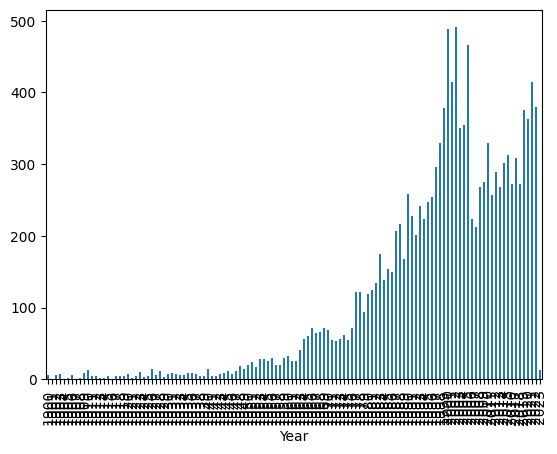

In [8]:
df_events[df_events["Latitude"].isna() | df_events["Longitude"].isna()].groupby("Year").count()["Dis No"].plot.bar()

I propose we drop the following columns:

1. Year (unclear imo, we already have start year and end year)
2. Glide (for now, from the documentation we can conclude that is a uuid for natural disasters, so if we find another dataset to augment this one we can still use it to link events with each other)
3. Location (again I don't think we need it since we already have Country, ISO, Latitude and Longitude)
4. OFDA Response (I don't think this is usefull for our visualisations)
5. Appeal (Again not sure if this is relevant for our visualisations)
6. Declaration (related to Appeal, not really relevant imo)
8. Adm Level, Admin1 Code, Admin2 Code (I don't think they are explained in the accompanying documentation and I can't figure them out so not usefull imo)
9. Geo Locations (they seem to be related with Admin1 code and Admin2 code, and I think we have enough location data for now)
10. Seq
11. Disaster Group
12. Diaster Subgroup
    - Extra Terrestial
    - Biological ?